# Pandas: Biblioteca para Manipulação de Dados

Pandas é uma biblioteca de código aberto para a manipulação e análise de dados estruturados em Python. Ele fornece estruturas de dados flexíveis e eficientes como DataFrame e Series, permitindo operações rápidas e intuitivas.

## O que é o Pandas?

- Uma biblioteca de código aberto para análise de dados em Python.
- Baseada no NumPy, otimizada para grandes volumes de dados.
- Possui funcionalidades para manipulação, filtragem, agregação e visualização de dados.

## Estruturas de Dados no Pandas
- **Series**: Um array unidimensional, semelhante a uma lista, mas com indexação.
- **DataFrame**: Uma estrutura bidimensional (tabelas), que pode conter múltiplas colunas.

In [4]:
import pandas as pd
import random

## Criando Series e DataFrames

In [5]:
# Criando uma Series
s = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print(s)
print(type(s))

a    10
b    20
c    30
d    40
dtype: int64
<class 'pandas.core.series.Series'>


In [6]:
# print(s.values)
# print(s.index)
# print(s.dtype)
# print(s.mean())
print(s['b'])

20


In [64]:
D = {
    'Nome': ['Alice', 'Bob', 'Carlos', 'Daniel'],
    'Idade': [25, 30, 35, None],
    'Salário': [50000, 60000, 70000, None]
}
D

{'Nome': ['Alice', 'Bob', 'Carlos', 'Daniel'],
 'Idade': [25, 30, 35, None],
 'Salário': [50000, 60000, 70000, None]}

In [65]:
# Criando um DataFrame
df = pd.DataFrame(D)
df

,Nome,Idade,Salário
0,Alice,25.0,50000.0
1,Bob,30.0,60000.0
2,Carlos,35.0,70000.0
3,Daniel,NaN,NaN


## Seleção de Dados (iloc e loc)

In [67]:
# Selecionando colunas
print(df['Nome'])

0     Alice
1       Bob
2    Carlos
3    Daniel
Name: Nome, dtype: object


In [71]:
# Selecionando linhas pelo índice
print(df.loc[1])  # Utilizando loc

Bob


In [72]:
# Selecionando linhas pelo índice
print(df.loc[1, 'Nome'])  # Utilizando loc

Bob


In [75]:
# Selecionando com iloc
df.iloc[0:2]

,Nome,Idade,Salário
0,Alice,25.0,50000.0
1,Bob,30.0,60000.0


In [76]:
# Selecionando com iloc
df.iloc[0:2, 2]

0    50000.0
1    60000.0
Name: Salário, dtype: float64

## Estatísticas Descritivas

In [12]:
# Informações de estruturas de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Nome     4 non-null      object 
 1   Idade    3 non-null      float64
 2   Salário  3 non-null      float64
dtypes: float64(2), object(1)
memory usage: 228.0+ bytes


In [13]:
# Estatísticas básicas
df.describe()

,Idade,Salário
count,3.0,3.0
mean,30.0,60000.0
std,5.0,10000.0
min,25.0,50000.0
25%,27.5,55000.0
50%,30.0,60000.0
75%,32.5,65000.0
max,35.0,70000.0


In [14]:
# Média das colunas numéricas
df.select_dtypes(include=['number']).mean()

Idade         30.0
Salário    60000.0
dtype: float64

In [15]:
aux = df[ df['Salário'] > 50000 ] # semelhante ao filter
aux

,Nome,Idade,Salário
1,Bob,30.0,60000.0
2,Carlos,35.0,70000.0


## Renomeando Colunas

In [16]:
df = df.rename(columns={'Nome': 'Primeiro Nome', 'Cidade': 'Localidade'})
df

,Primeiro Nome,Idade,Salário
0,Alice,25.0,50000.0
1,Bob,30.0,60000.0
2,Carlos,35.0,70000.0
3,Daniel,NaN,NaN


## Manipulação de Dados

In [17]:
# Criando uma nova coluna
df['Altura'] = [1.65, 1.75, 1.80, 1.90]
df

,Primeiro Nome,Idade,Salário,Altura
0,Alice,25.0,50000.0,1.65
1,Bob,30.0,60000.0,1.75
2,Carlos,35.0,70000.0,1.80
3,Daniel,NaN,NaN,1.90


In [79]:
df['Conjunto'] = s.values

In [80]:
# Modificando uma coluna existente
df['Idade'] = df['Idade'] + 2
# df['Idade'] += 2
df

,Nome,Idade,Salário,Conjunto
0,Alice,27.0,50000.0,10
1,Bob,32.0,60000.0,20
2,Carlos,37.0,70000.0,30
3,Daniel,NaN,NaN,40


In [82]:
df['Nome'] += ' Santos'

In [83]:
df

,Nome,Idade,Salário,Conjunto
0,Alice Santos,27.0,50000.0,10
1,Bob Santos,32.0,60000.0,20
2,Carlos Santos,37.0,70000.0,30
3,Daniel Santos,NaN,NaN,40


## Filtrando Dados

In [21]:
# Filtrando pessoas com idade maior que 30
df_filtrado = df[df['Idade'] > 45]
df_filtrado

,Primeiro Nome,Idade,Salário,Altura,Conjunto


In [84]:
type(df_filtrado)

pandas.core.frame.DataFrame

## Trabalhando com valores nulos

In [89]:
df_null = pd.DataFrame({'A': [1, None, 3], 'B': [4, 5, None]})
df_null

,A,B
0,1.0,4.0
1,NaN,5.0
2,3.0,NaN


In [90]:
# Verificar valores nulos
df_null.isnull()

,A,B
0,False,False
1,True,False
2,False,True


In [91]:
# Preencher com média
df_null.fillna(df_null.mean(), inplace=True)
# df_null = df_null.fillna(df_null.mean(numeric_only=True))
df_null

,A,B
0,1.0,4.0
1,2.0,5.0
2,3.0,4.5


## Agrupamento de dados com `groupby`

In [25]:
# Criando um novo DataFrame para agrupamento
df_group = pd.DataFrame({
    'Categoria': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Valor': [100, 200, 300, 400, 500, 600]
})

df_group

,Categoria,Valor
0,A,100
1,A,200
2,B,300
3,B,400
4,C,500
5,C,600


In [26]:
# Agrupar e calcular a média
df_grouped = df_group.groupby('Categoria').mean()
df_grouped

,Valor
Categoria,
A,150.0
B,350.0
C,550.0


## Ordenação de Dados

In [98]:
df_sorted = df.sort_values(by='Idade', ascending=False)
df_sorted

,Nome,Idade,Salário,Conjunto
2,Carlos Santos,37.0,70000.0,30
1,Bob Santos,32.0,60000.0,20
0,Alice Santos,27.0,50000.0,10
3,Daniel Santos,NaN,NaN,40


In [99]:
df_sorted = df_sorted.reset_index(drop=True)
df_sorted

,Nome,Idade,Salário,Conjunto
0,Carlos Santos,37.0,70000.0,30
1,Bob Santos,32.0,60000.0,20
2,Alice Santos,27.0,50000.0,10
3,Daniel Santos,NaN,NaN,40


## Juntando DataFrames

In [92]:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Nome': ['Alice', 'Bob', 'Carlos']})
df2 = pd.DataFrame({'ID': [1, 2, 3], 'Salário': [50000, 60000, 70000]})

In [93]:
# Mesclando DataFrames
df_merged = pd.merge(df1, df2, on='ID')
df_merged

,ID,Nome,Salário
0,1,Alice,50000
1,2,Bob,60000
2,3,Carlos,70000


## Aplicação de Funções com `apply`

In [30]:
# Criando uma função para converter idade em décadas
def idade_em_decadas(idade):
    return idade // 10

df['Décadas'] = df['Idade'].apply(idade_em_decadas)
df

,Primeiro Nome,Idade,Salário,Altura,Conjunto,Décadas
0,Alice Santos,27.0,50000.0,1.65,10,2.0
1,Bob Santos,32.0,60000.0,1.75,20,3.0
2,Carlos Santos,37.0,70000.0,1.80,30,3.0
3,Daniel Santos,NaN,NaN,1.90,40,NaN


In [31]:
# df['Décadas'] = df['Idade'].apply(lambda x: x // 10)

## Transformações com `apply` e `lambda`

In [32]:
import random

# Criando um novo DataFrame sem numpy
df_num = pd.DataFrame({col: [random.randint(1, 100) for _ in range(4)] for col in 'ABCD'})
df_num.head()

,A,B,C,D
0,92,14,91,61
1,41,59,26,53
2,18,10,73,56
3,96,82,99,95


In [33]:
# Aplicando transformação com map em uma coluna específica
df_num['A'] = df_num['A'].apply(lambda x: x * 2)
df_num.head()

,A,B,C,D
0,184,14,91,61
1,82,59,26,53
2,36,10,73,56
3,192,82,99,95


In [34]:
# Aplicando transformação em toda a tabela com map
df_transf = df_num.apply(lambda x: x / 10)
df_transf

,A,B,C,D
0,18.4,1.4,9.1,6.1
1,8.2,5.9,2.6,5.3
2,3.6,1.0,7.3,5.6
3,19.2,8.2,9.9,9.5


In [35]:
# Outro exemplo mais complexo
df_num['E'] = df_num['A'].apply(lambda x: x*10 if x < 100 else x)
# df_num['E'] = df_num['A'].apply(lambda x: x*10 if x < 100 else x).apply(lambda x: x * 2).astype(str).str.split('0').str[0]
df_num.head()

,A,B,C,D,E
0,184,14,91,61,184
1,82,59,26,53,820
2,36,10,73,56,360
3,192,82,99,95,192


In [36]:
df_num['E'][2]

360

## Manipulação de Datas

In [116]:
df_dates = pd.DataFrame({'Data': ['2023-01-01', '2023-06-15', '2023-12-31'], 'Cidade': ['RJ', 'SP', 'BH']})
print(type(df_dates['Data'][0]))
df_dates

<class 'str'>


,Data,Cidade
0,2023-01-01,RJ
1,2023-06-15,SP
2,2023-12-31,BH


In [117]:
# Convertendo para formato de data
df_dates['Data timestamp'] = pd.to_datetime(df_dates['Data'])
print(type(df_dates['Data'][0]))
df_dates

<class 'str'>


,Data,Cidade,Data timestamp
0,2023-01-01,RJ,2023-01-01
1,2023-06-15,SP,2023-06-15
2,2023-12-31,BH,2023-12-31


In [118]:
# Extraindo o mês
df_dates['Mês'] = df_dates['Data timestamp'].dt.month
df_dates

,Data,Cidade,Data timestamp,Mês
0,2023-01-01,RJ,2023-01-01,1
1,2023-06-15,SP,2023-06-15,6
2,2023-12-31,BH,2023-12-31,12


In [119]:
df_dates['Mês com dígito'] = df_dates['Data'].str.split('-').str[1]

In [120]:
df_dates

,Data,Cidade,Data timestamp,Mês,Mês com dígito
0,2023-01-01,RJ,2023-01-01,1,01
1,2023-06-15,SP,2023-06-15,6,06
2,2023-12-31,BH,2023-12-31,12,12


## Janela Móvel (Rolling)

In [42]:
# Criando um dataframe randômico
df_roll = pd.DataFrame({'Valor': [random.randint(1, 100) for _ in range(10)]})
df_roll.head(6)

,Valor
0,14
1,100
2,19
3,48
4,11
5,82


In [43]:
# Média móvel com janela de 4
df_roll['Média_Móvel'] = df_roll['Valor'].rolling(window=4).mean()

# df_roll['Média_Móvel'] = df_roll['Média_Móvel'].apply(lambda x: x if x > 0 else 0)

# Substituir nans pelos valores da coluna Valor
df_roll

,Valor,Média_Móvel
0,14,NaN
1,100,NaN
2,19,NaN
3,48,45.25
4,11,44.50
5,82,40.00
6,13,38.50
7,87,48.25
8,85,66.75
9,62,61.75


## Tratamento de string

In [103]:
# Criando um DataFrame aleatório com colunas de strings
data = {
    'Nome': ['Carlos Silva', 'Maria Souza', 'Ana Paula', 'Pedro Oliveira', 'João Costa'],
    'Email': ['carlos@gmail.com', 'maria@hotmail.com', 'ana@yahoo.com', 'pedro@gmail.com', 'joao@outlook.com'],
    'Profissao': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Engenheiro'],
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba', 'Salvador']
}

df = pd.DataFrame(data)
df

,Nome,Email,Profissao,Cidade
0,Carlos Silva,carlos@gmail.com,Engenheiro,São Paulo
1,Maria Souza,maria@hotmail.com,Médico,Rio de Janeiro
2,Ana Paula,ana@yahoo.com,Professor,Belo Horizonte
3,Pedro Oliveira,pedro@gmail.com,Advogado,Curitiba
4,João Costa,joao@outlook.com,Engenheiro,Salvador


Exemplo 1: Filtrar emails do Gmail usando `str.contains()`

In [105]:
df_gmail = df[ (df['Email'].str.contains('gmail', case=False)) | (df['Email'].str.contains('hotmail', case=False)) ]
print("\n📌 Emails do Gmail filtrados:")
df_gmail


📌 Emails do Gmail filtrados:


,Nome,Email,Profissao,Cidade
0,Carlos Silva,carlos@gmail.com,Engenheiro,São Paulo
1,Maria Souza,maria@hotmail.com,Médico,Rio de Janeiro
3,Pedro Oliveira,pedro@gmail.com,Advogado,Curitiba


Exemplo 2: Substituir 'Engenheiro' por 'Arquiteto' na coluna 'Profissao' usando `str.replace()`

In [46]:
df['Profissao'] = df['Profissao'].str.replace('Dentista', 'Ortopedista').str.replace('Ortopedista', 'Gastro')
df

,Nome,Email,Profissao,Cidade
0,Carlos Silva,carlos@gmail.com,Engenheiro,São Paulo
1,Maria Souza,maria@hotmail.com,Médico,Rio de Janeiro
2,Ana Paula,ana@yahoo.com,Professor,Belo Horizonte
3,Pedro Oliveira,pedro@gmail.com,Advogado,Curitiba
4,João Costa,joao@outlook.com,Engenheiro,Salvador


Exemplo 3: Extrair o domínio dos emails usando `str.split()`

In [47]:
df['Dominio_Email'] = df['Email'].str.split('@').str[1]
df

,Nome,Email,Profissao,Cidade,Dominio_Email
0,Carlos Silva,carlos@gmail.com,Engenheiro,São Paulo,gmail.com
1,Maria Souza,maria@hotmail.com,Médico,Rio de Janeiro,hotmail.com
2,Ana Paula,ana@yahoo.com,Professor,Belo Horizonte,yahoo.com
3,Pedro Oliveira,pedro@gmail.com,Advogado,Curitiba,gmail.com
4,João Costa,joao@outlook.com,Engenheiro,Salvador,outlook.com


Exemplo 4: Converter todos os nomes para letras minúsculas usando `str.lower()`

In [112]:
df['Nome'] = df['Nome'].str.lower().apply(lambda x: x + '                         ')
df

,Nome,Email,Profissao,Cidade
0,carlos silva ...,carlos@gmail.com,Engenheiro,São Paulo
1,maria souza ...,maria@hotmail.com,Médico,Rio de Janeiro
2,ana paula ...,ana@yahoo.com,Professor,Belo Horizonte
3,pedro oliveira ...,pedro@gmail.com,Advogado,Curitiba
4,joão costa ...,joao@outlook.com,Engenheiro,Salvador


Exemplo 5: Remover espaços extras dos nomes usando `str.strip()`

In [110]:
df['Nome'] = df['Nome'].str.strip()
df

,Nome,Email,Profissao,Cidade
0,carlos silva,carlos@gmail.com,Engenheiro,São Paulo
1,maria souza,maria@hotmail.com,Médico,Rio de Janeiro
2,ana paula,ana@yahoo.com,Professor,Belo Horizonte
3,pedro oliveira,pedro@gmail.com,Advogado,Curitiba
4,joão costa,joao@outlook.com,Engenheiro,Salvador


## Conversão de tipos

In [50]:
df['Idade'] = range(5)
df['Idade'] = df['Idade'].apply(lambda x: x + 20)

In [51]:
df.head()

,Nome,Email,Profissao,Cidade,Dominio_Email,Idade
0,CARLOS SILVA,carlos@gmail.com,Engenheiro,São Paulo,gmail.com,20
1,MARIA SOUZA,maria@hotmail.com,Médico,Rio de Janeiro,hotmail.com,21
2,ANA PAULA,ana@yahoo.com,Professor,Belo Horizonte,yahoo.com,22
3,PEDRO OLIVEIRA,pedro@gmail.com,Advogado,Curitiba,gmail.com,23
4,JOÃO COSTA,joao@outlook.com,Engenheiro,Salvador,outlook.com,24


In [52]:
df['Idade'] = df['Idade'].astype(str)
# df['Idade'].mean()

In [53]:
df['Idade'] = df['Idade'].astype(float)
df['Idade'].mean()

df

,Nome,Email,Profissao,Cidade,Dominio_Email,Idade
0,CARLOS SILVA,carlos@gmail.com,Engenheiro,São Paulo,gmail.com,20.0
1,MARIA SOUZA,maria@hotmail.com,Médico,Rio de Janeiro,hotmail.com,21.0
2,ANA PAULA,ana@yahoo.com,Professor,Belo Horizonte,yahoo.com,22.0
3,PEDRO OLIVEIRA,pedro@gmail.com,Advogado,Curitiba,gmail.com,23.0
4,JOÃO COSTA,joao@outlook.com,Engenheiro,Salvador,outlook.com,24.0


## Histograma

In [123]:
# Criando um dataset fictício sem numpy
random.seed(42)
data = {
    "Idade": [random.randint(20, 60) for _ in range(500)],  # Idades entre 20 e 60
    "Salário": [random.randint(2000, 10000) for _ in range(500)],  # Salários entre 2000 e 10000
    "Notas": [round(random.uniform(0, 10), 2) for _ in range(500)]  # Notas entre 0 e 10 com 2 casas decimais
}

df = pd.DataFrame(data)
df.head()

,Idade,Salário,Notas
0,60,4350,4.79
1,27,3721,3.41
2,21,5521,9.65
3,37,8436,2.52
4,35,6751,8.62


<Axes: title={'center': 'Distribuição de Notas'}, ylabel='Frequency'>

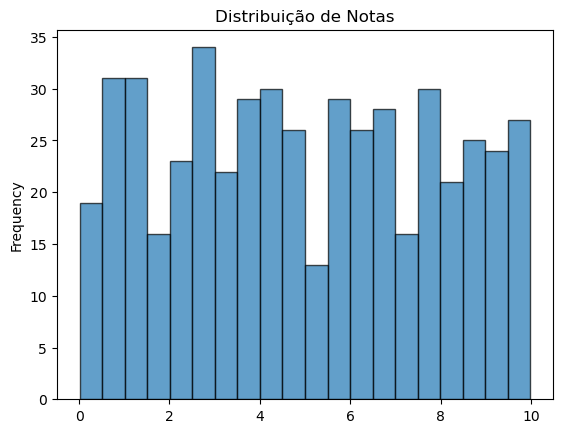

In [134]:
# Criando um histograma
col = 'Notas'
df[col].plot(kind="hist", bins=20, ec="black", alpha=0.7, title="Distribuição de " + col)

## Categorizar valores contínuos em intervalos
O `pd.cut` é usado para categorizar valores contínuos em intervalos (bins). Ele é útil quando você deseja agrupar dados numéricos em faixas, como criar categorias de idade ou faixas salariais.

In [56]:
# Definindo os intervalos para agrupar as idades
bins = [0, 18, 30, 45, 60, 100]  # Faixas etárias
labels = ["0-18", "19-30", "31-45", "46-60", "60+"]  # Rótulos para cada grupo

# Criando uma nova coluna com as categorias de idade
df["Faixa Etária"] = pd.cut(df["Idade"], bins=bins, labels=labels)

# Exibir algumas linhas do DataFrame para ver o resultado
df.head()

,Idade,Salário,Notas,Faixa Etária
0,60,4350,4.79,46-60
1,27,3721,3.41,19-30
2,21,5521,9.65,19-30
3,37,8436,2.52,31-45
4,35,6751,8.62,31-45


In [57]:
df["Faixa Salarial"] = pd.cut(df["Salário"], bins=4)  # Divide em 4 grupos automáticos
df[["Salário", "Faixa Salarial"]].head()

,Salário,Faixa Salarial
0,4350,"(4033.75, 6022.5]"
1,3721,"(2037.045, 4033.75]"
2,5521,"(4033.75, 6022.5]"
3,8436,"(8011.25, 10000.0]"
4,6751,"(6022.5, 8011.25]"


## Pivot Tables

In [60]:
df = pd.DataFrame({
    'Cidade': ['SP', 'SP', 'RJ', 'RJ', 'RJ', 'SP', 'SP', 'RJ'],
    'Ano': [2020, 2021, 2020, 2021, 2020, 2020, 2021, 2020],
    'Vendas': [100, 150, 200, 250, 50, 250, 300, 150]
})

df

,Cidade,Ano,Vendas
0,SP,2020,100
1,SP,2021,150
2,RJ,2020,200
3,RJ,2021,250
4,RJ,2020,50
5,SP,2020,250
6,SP,2021,300
7,RJ,2020,150


In [61]:
# Criando tabela pivô
df_pivot = df.pivot_table(values='Vendas', index='Cidade', columns='Ano', aggfunc='sum')
df_pivot

Ano,2020,2021
Cidade,,
RJ,400,250
SP,350,450
